In [1]:
import pandas as pd
import numpy as np
import cplex

from sys import path
path.append("..") 
import matplotlib.pyplot as plt

from CPNorm import CorrNorm

In [2]:
df = pd.DataFrame({
    'A': [20000,300000,4000000, 80000000],
    'B': [100,1000,10000,100000],
    'C': [100,1000,10000,100000],
    'D': [34,340,3400, 34000]

}, index=['cell1', 'cell2', 'cell3', 'cell4'])
normalization = CorrNorm(df, 0.999999)
normalization.write_problem()
normalization.solve()
result = normalization.get_beta_values()
print(normalization.get_normalized_data())
print(normalization.get_beta_values())


Default row names c1, c2 ... being created.


[4.306081745657977, 5.480495608739412, 6.604593211581229, 7.904358444135988]
Version identifier: 20.1.0.1 | 2022-01-05 | 9df5e5246
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Aggregator did 1 substitutions.


Reduced QCP has 61 rows, 62 columns, and 151 nonzeros.
Reduced QCP has 9 quadratic constraints.
Presolve time = 0.00 sec. (0.04 ticks)
Parallel mode: using up to 12 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 700
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.04 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 12
  Rows in Factor            = 61
  Integer space required    = 158
  Total non-zeros in factor = 1191
  Total FP ops to factor    = 31159
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf Inf Ratio
   0   1.8284903e+00  -9.9991258e-01  1.81e+02  0.00e+00  2.29e+01  1.00e+00
   1   2.6018167e+00   2.0953406e+00  1.81e+02  0.00e+00  2.29e+01  1.15e+00
   2   9.3531551e-01   7.3932028e-01  6.51e+01  0.00e+00  8.24e+00  4.84e+00
   3   4.8844997e-02  -4.7162164e-02  1.90e+01  0.00e+00  2.41e+00  8.38e+00
   4   6.1827301e-02   3.3845239e-02  1.02e+01  0.00e+00  1.29e+00

In [5]:
%%capture
#TESTING A RANGE OF ETA PARAMETERS
resultDF = pd.DataFrame(columns=['VarLib', 'MeanAbsCov'])

#eta towards 1 results in covarainces going to zero
#eta towards 0 is only library size normalisation
etaList = np.arange(0.0, 1.0, 0.1).tolist()
etaList =  [0.9, 0.99, 0.999, 0.9999, 0.99999, 0.999999, 0.9999999, 0.99999999, 0.999999999, 1.0] + etaList
for eta in etaList:
    normalization = CorrNorm(df, eta)
    normalization.write_problem()
    normalization.solve()

    libVar = (normalization.get_librarySize_variance())
    meanAbsCov = np.mean(np.abs(normalization.get_covariance_thresholds()))
    meanAbsCov = normalization.get_mean_of_absolute_covariances()

    new_row = {'VarLib': libVar, 'MeanAbsCov': meanAbsCov}
    resultDF = resultDF.append(new_row, ignore_index=True)
    print("VARIABLES!!")
    print(normalization.get_covariance_thresholds())
    print(libVar)

0     12.869400
1     11.808447
2     11.708820
3     11.442936
4      7.613117
5      8.346301
6      2.262730
7      1.775337
8      1.731905
9      1.733031
10    29.799653
11    23.901035
12    22.253777
13    21.169370
14    20.046422
15    18.737641
16    17.270525
17    15.745561
18    14.231008
19    12.869400
Name: MeanAbsCov, dtype: float64
0     4.217084e+11
1     4.334234e+11
2     4.346259e+11
3     4.376055e+11
4     4.831860e+11
5     3.043201e+12
6     5.194800e+13
7     7.862213e+13
8     8.188270e+13
9     8.179530e+13
10    3.627505e-01
11    1.066570e+11
12    1.932711e+11
13    2.541279e+11
14    2.993090e+11
15    3.344193e+11
16    3.623850e+11
17    3.853149e+11
18    4.049351e+11
19    4.217084e+11
Name: VarLib, dtype: float64
[0.9, 0.99, 0.999, 0.9999, 0.99999, 0.999999, 0.9999999, 0.99999999, 0.999999999, 1.0, 0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]


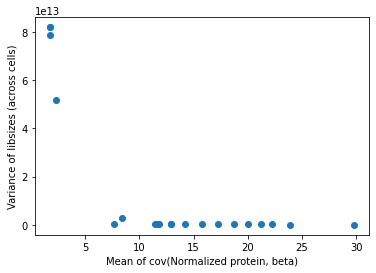

In [6]:
print(resultDF['MeanAbsCov'])
print(resultDF['VarLib'])
print(etaList)

plt.scatter((resultDF['MeanAbsCov']), (resultDF['VarLib']))
plt.xlabel('Mean of cov(Normalized protein, beta)')
plt.ylabel('Variance of libsizes (across cells)')
plt.show()

In [7]:
eta = 0.99999

normalization = CorrNorm(df, eta)
normalization.write_problem()
normalization.solve()

print(normalization.get_normalized_data())

Default row names c1, c2 ... being created.


[4.306081745657977, 5.480495608739412, 6.604593211581229, 7.904358444135988]
Version identifier: 20.1.0.1 | 2022-01-05 | 9df5e5246
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.


Aggregator did 1 substitutions.
Reduced QCP has 61 rows, 62 columns, and 151 nonzeros.
Reduced QCP has 9 quadratic constraints.
Presolve time = 0.00 sec. (0.04 ticks)
Parallel mode: using up to 12 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 700
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.04 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 12
  Rows in Factor            = 61
  Integer space required    = 158
  Total non-zeros in factor = 1191
  Total FP ops to factor    = 31159
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf Inf Ratio
   0   1.8290584e+00  -9.9912578e-01  1.81e+02  0.00e+00  2.29e+01  1.00e+00
   1   2.6020088e+00   2.0956129e+00  1.81e+02  0.00e+00  2.29e+01  1.15e+00
   2   9.3536247e-01   7.3939061e-01  6.52e+01  0.00e+00  8.24e+00  4.84e+00
   3   4.8860801e-02  -4.7134103e-02  1.90e+01  0.00e+00  2.41e+00  8.38e+00
   4   6.1823308e-02   3.3843872e-

In [8]:
df = pd.read_csv("/Users/t.stohn/Desktop/Projects/scNormalization/CorrelationPreservationNorm/test/LinearTrajectory/Simulation.tsv", sep = "\t")
df = df[["sample_id","ab_id","ab_count_normalized"]]
df = df.pivot(index="sample_id", columns="ab_id", values="ab_count_normalized")

df

ab_id,AB0,AB1,AB10,AB11,AB12,AB13,AB14,AB15,AB16,AB17,AB18,AB19,AB2,AB3,AB4,AB5,AB6,AB7,AB8,AB9
sample_id,,,,,,,,,,,,,,,,,,,,
sample_1,1766556.0,9145607.0,3551513.0,5115651.0,2447416.0,2539424.0,10783352.0,4361185.0,3036268.0,12531506.0,2778645.0,2686637.0,2852252.0,6274954.0,14518881.0,3349096.0,2981063.0,2134588.0,18714452.0,18677648.0
sample_10,893919.0,7065638.0,3049123.0,2669513.0,1787839.0,2253167.0,3575678.0,5498217.0,5461481.0,4800225.0,1947030.0,2522567.0,2473585.0,6453364.0,10420897.0,1077602.0,1126583.0,685746.0,3379750.0,13874120.0
sample_100,2920268.0,4772676.0,3988127.0,2985647.0,3465094.0,1656271.0,4903435.0,6908395.0,8869769.0,39576167.0,2440821.0,2571579.0,6341776.0,5775156.0,4031713.0,2724130.0,1852409.0,5186744.0,19875255.0,8782596.0
sample_101,1820762.0,8596763.0,5139620.0,4955239.0,2719619.0,6522477.0,3825905.0,6199810.0,4816953.0,31206479.0,5324001.0,3503238.0,3572381.0,6130667.0,27080955.0,3618477.0,4079429.0,1843810.0,30215431.0,29086098.0
sample_102,6532003.0,10802928.0,17963008.0,25813973.0,19784432.0,6720426.0,15576315.0,27509782.0,9107120.0,393553178.0,12749967.0,6532003.0,7034465.0,19847240.0,54579909.0,7348503.0,8730273.0,15073853.0,71977648.0,82466537.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_95,1304789.0,4056907.0,2214852.0,4572244.0,4648996.0,2291604.0,5679669.0,8201530.0,3530605.0,17861354.0,2817906.0,1853020.0,1129355.0,4824430.0,4287164.0,1798197.0,921027.0,910063.0,14275926.0,8782655.0
sample_96,878673.0,6168284.0,3268663.0,6572474.0,3497118.0,4200057.0,3092929.0,5922256.0,3479545.0,14919867.0,1581611.0,878673.0,1441024.0,8364967.0,2864474.0,3883734.0,2056095.0,1089554.0,11967526.0,4182483.0
sample_97,6947034.0,19274102.0,16087868.0,10603367.0,18751768.0,9610934.0,9402001.0,8305101.0,9349767.0,68530139.0,3134000.0,6685867.0,9297534.0,20893335.0,40010736.0,4178667.0,7939467.0,5171100.0,50248471.0,83573340.0


In [6]:
%%capture
#TESTING A RANGE OF ETA PARAMETERS

resultDF = pd.DataFrame(columns=['VarLib', 'MeanAbsCov', 'Eta'])

#eta towards 1 results in covarainces going to zero
#eta towards 0 is only library size normalisation

etaList = np.arange(0.0, 1.0, 0.1).tolist()
etaList =  [0.9, 0.99, 0.999, 0.9999, 0.99999, 0.999999, 0.9999999, 0.99999999, 0.999999999, 1.0] + etaList

for eta in etaList:
    normalization = CorrNorm(df, eta)
    normalization.write_problem()
    normalization.solve()

    libVar = (normalization.get_librarySize_variance())
    meanAbsCov = (normalization.get_mean_of_absolute_covariances_log())

    new_row = {'VarLib': libVar, 'MeanAbsCov': meanAbsCov, "Eta" : eta}
    resultDF = resultDF.append(new_row, ignore_index=True)

          VarLib  MeanAbsCov       Eta
0   2.070214e+15    0.124631  0.900000
1   2.071078e+15    0.124340  0.990000
2   2.081696e+15    0.124480  0.999000
3   2.136043e+15    0.122509  0.999900
4   3.170477e+15    0.108188  0.999990
5   2.464340e+16    0.024200  0.999999
6   2.813118e+16    0.018648  1.000000
7   2.848630e+16    0.018132  1.000000
8   2.852148e+16    0.018081  1.000000
9   2.852898e+16    0.018068  1.000000
10  1.706820e+08    0.163850  0.000000
11  2.002197e+15    0.125265  0.100000
12  2.039681e+15    0.124912  0.200000
13  2.052614e+15    0.124798  0.300000
14  2.059081e+15    0.124715  0.400000
15  2.063126e+15    0.124697  0.500000
16  2.065793e+15    0.124677  0.600000
17  2.067650e+15    0.124646  0.700000
18  2.069035e+15    0.124620  0.800000
19  2.070214e+15    0.124631  0.900000


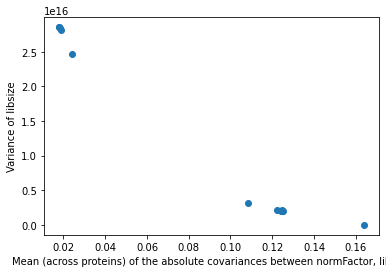

In [7]:
print(resultDF)

# Create scatter plot
plt.scatter(resultDF['MeanAbsCov'], resultDF['VarLib'])

# Add labels and title
plt.xlabel('Mean (across proteins) of the absolute covariances between normFactor, libsize')
plt.ylabel('Variance of libsize')

# Show plot
plt.show()

In [12]:
%%capture
normalization = CorrNorm(df, 0.999990)
normalization.write_problem()
normalization.solve()


In [13]:
normData = normalization.get_normalized_data()
normData.to_csv( "./corrPres.tsv", sep = "\t")

In [48]:
print(normalization.get_librarySize_variance())
print(normalization.get_mean_of_absolute_covariances())


2.7968913454066296e+16
Protein counts
_____________
sample_id
sample_1      1.807069e+06
sample_10     9.675190e+05
sample_100    3.000395e+06
sample_101    1.812237e+06
sample_102    5.653459e+06
                  ...     
sample_95     1.392566e+06
sample_96     9.407092e+05
sample_97     6.292305e+06
sample_98     5.623014e+06
sample_99     2.124778e+06
Name: AB0, Length: 500, dtype: float64
Aclced Cov: 
0.04520990938208986
Protein counts
_____________
sample_id
sample_1      9.355347e+06
sample_10     7.647381e+06
sample_100    4.903631e+06
sample_101    8.556513e+06
sample_102    9.349951e+06
                  ...     
sample_95     4.329826e+06
sample_96     6.603778e+06
sample_97     1.745760e+07
sample_98     3.794799e+07
sample_99     1.257369e+07
Name: AB1, Length: 500, dtype: float64
Aclced Cov: 
0.036733459004317674
Protein counts
_____________
sample_id
sample_1      3.632961e+06
sample_10     3.300170e+06
sample_100    4.097555e+06
sample_101    5.115556e+06
sample_102   